In [1]:
from labtools import assign_trigs_to_clicks, get_trig_len, get_dump, USER, LOC, correlation, shift_channels
import numpy as np
from labtools import plot_style, USER, LOC
import os
from matplotlib import pyplot as plt

In [24]:
p = plot_style.plotting()
p.saveDir = '/Users/vladislavbushmakin/Desktop/pics_pres'

In [10]:
dump_name = "molec_jessy_low_power_190deg_0.dump"
dump = f"{LOC['data']}/{dump_name}"
data = get_dump(dump)

In [11]:
data

memmap([(0, 3, 17217988849451101), (0, 1, 17217988851606075),
        (0, 3, 17217988853330606), ..., (0, 4, 17284650607967530),
        (0, 2, 17284650620268794), (0, 3, 17284650885882770)],
       dtype=[('time_from_trig', '<u4'), ('channel', '<i4'), ('time', '<u8')])

In [7]:
autoc_diffs_tot, autoc_diffs = correlation(data, corr_window=300000,
    start_chs=[1],
    stop_chs=[4],
    trig_ch=5,)

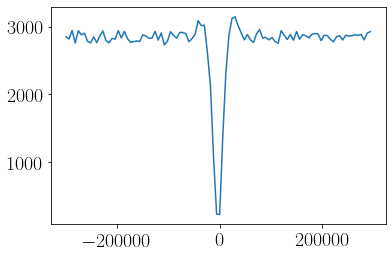

In [17]:
y, x = np.histogram(autoc_diffs_tot, bins=100, range=(-300000, 300000))
plt.plot(x[:-1], y)

In [134]:
data = shift_channels(data, -700, channels=[3])

In [143]:
autoc_diffs_tot2, autoc_diffs2 = correlation(data, corr_window=300000,
    start_chs=[1,2],
    stop_chs=[3,4],
    trig_ch=5,)

In [150]:
y, x = np.histogram(autoc_diffs_tot2, bins=550, range=(-300000, 300000))

In [151]:
y_normLevel = np.mean(y[np.abs(x[:-1])>80_000])

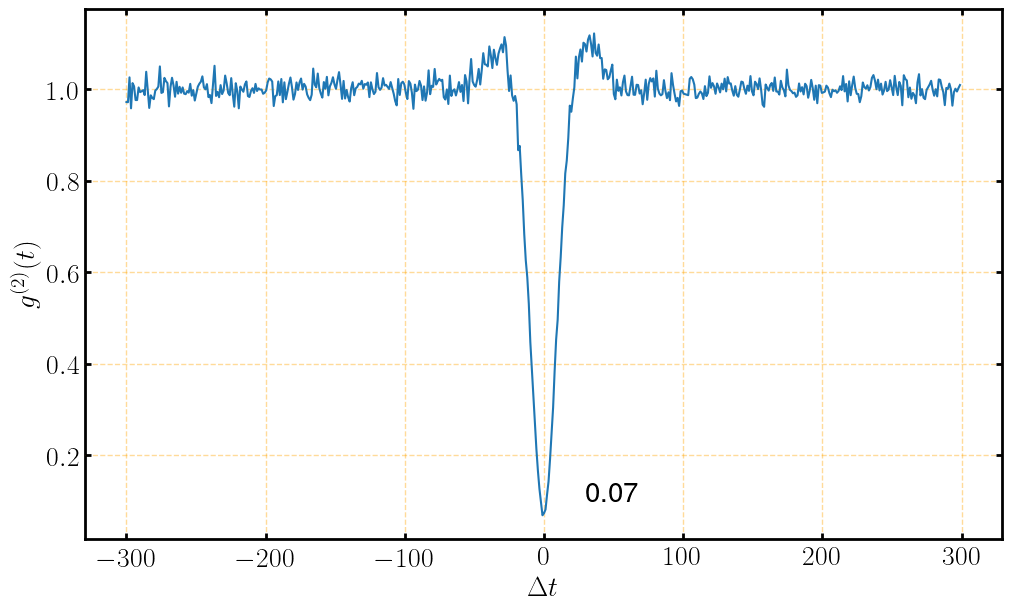

In [152]:
p.plot(x[:-1]/1000, y/y_normLevel, xLabel = r"$\Delta t$", yLabel=r"$g^{(2)}(t)$")
plt.annotate(f"{np.round(min(y/y_normLevel), 2)}", xy = (30, 0.1))
p.save(f"12-34_correlation")

In [168]:
data['time'] - start_t0

array([             0,        2151275,        3879506, ...,
       66661758514730, 66661770810994, 66662036431670], dtype=uint64)

In [239]:
start_t0 = data['time'][0]
plots = []
for t in np.arange(1e-13, 2, 0.05):
    autoc_diffs_tot, autoc_diffs = correlation(data[data['time'] < start_t0 + t*1e12], corr_window=300000,
        start_chs=[1,2],
        stop_chs=[3,4],
        trig_ch=5,)
    y, x = np.histogram(autoc_diffs_tot, bins=550, range=(-300000, 300000))
    y_normLevel = np.mean(y[np.abs(x[:-1])>80_000])
    x, y = x[:-1]/1000, y/y_normLevel
    plots.append((y,x))

/Users/vladislavbushmakin/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [240]:
import imageio
import os
def generate_animation_imgs(plots, name='nm.gif', duration=0.1):
    imgs = []
    y0, x0 = plots[0]
    p.plot(x0, y0, xLabel=r'$\Delta t$, ns', yLabel = r"$g^{(2)}(t)$")
    for i, gg in enumerate(plots):
        y, x = gg
        p.plot(x, y, xLabel=r'$\Delta t$, ns', yLabel = r"$g^{(2)}(t)$")
        plt.savefig(f"img{i}.png", dpi=150)
        imgs.append(imageio.imread(f"img{i}.png"))
        os.remove(f"img{i}.png")
    imageio.mimsave(name, imgs, loop=0, duration=duration)

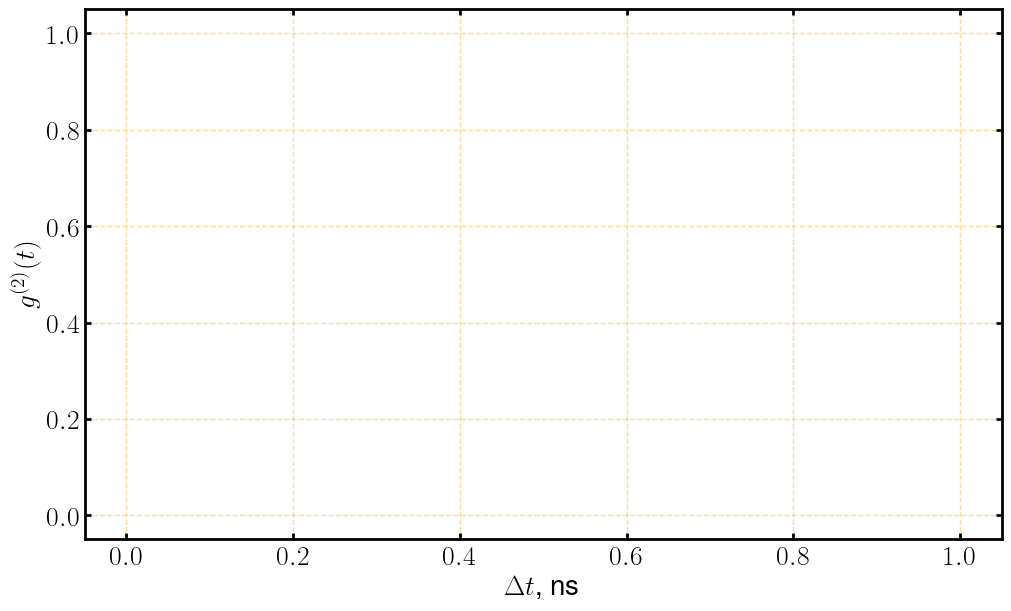

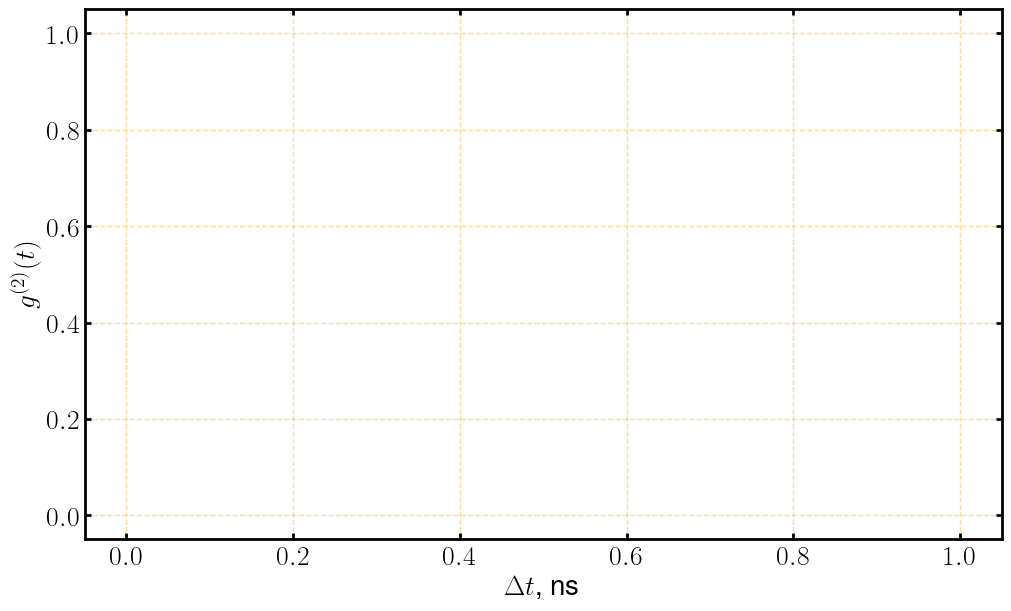

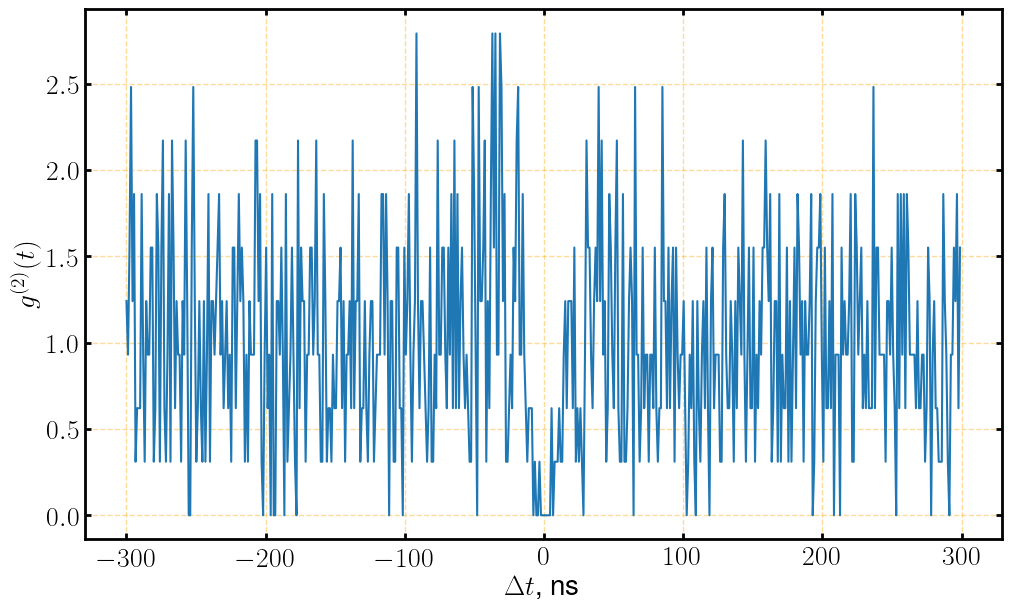

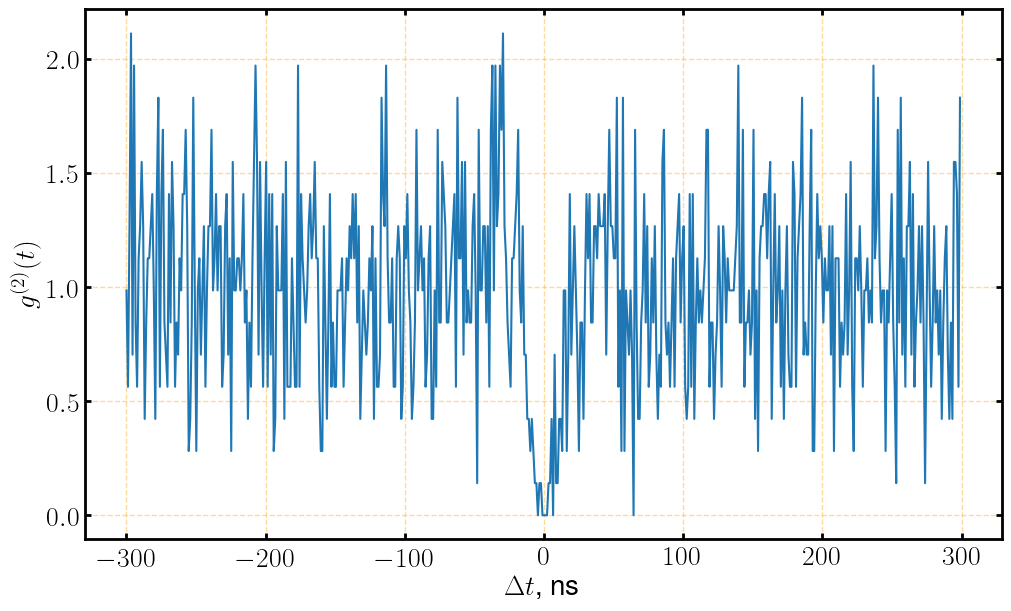

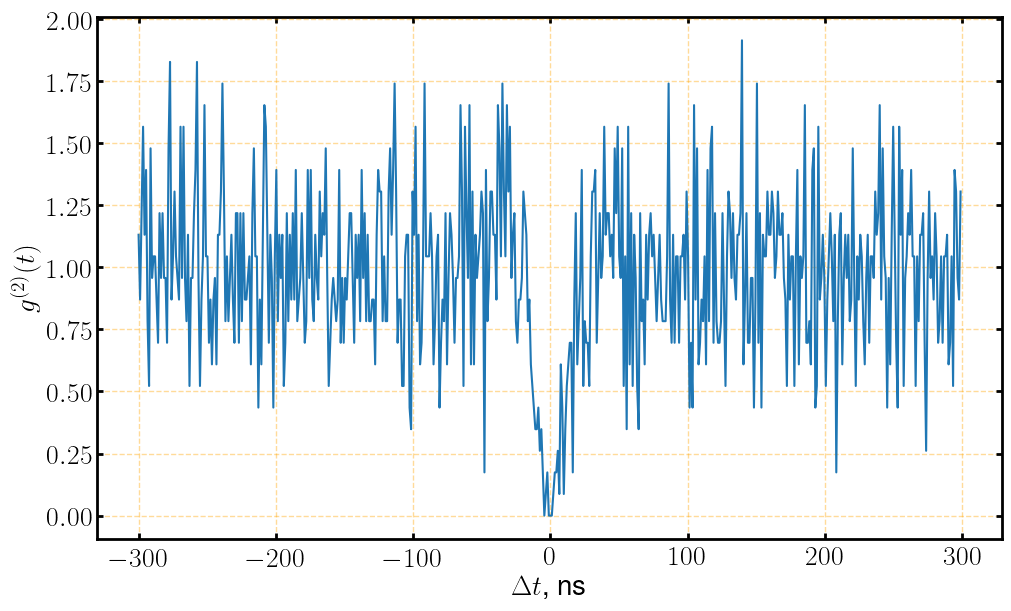

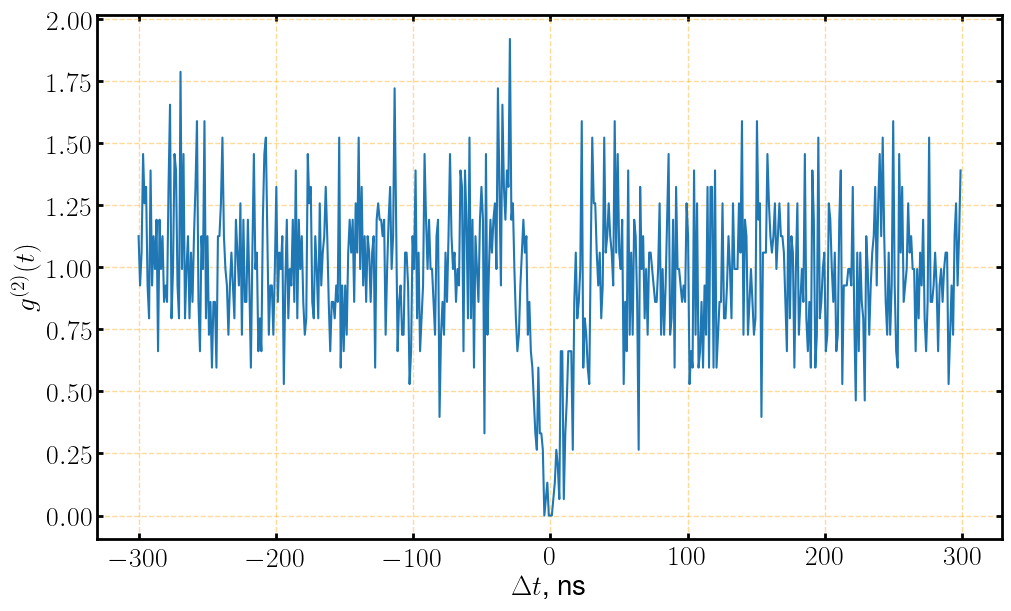

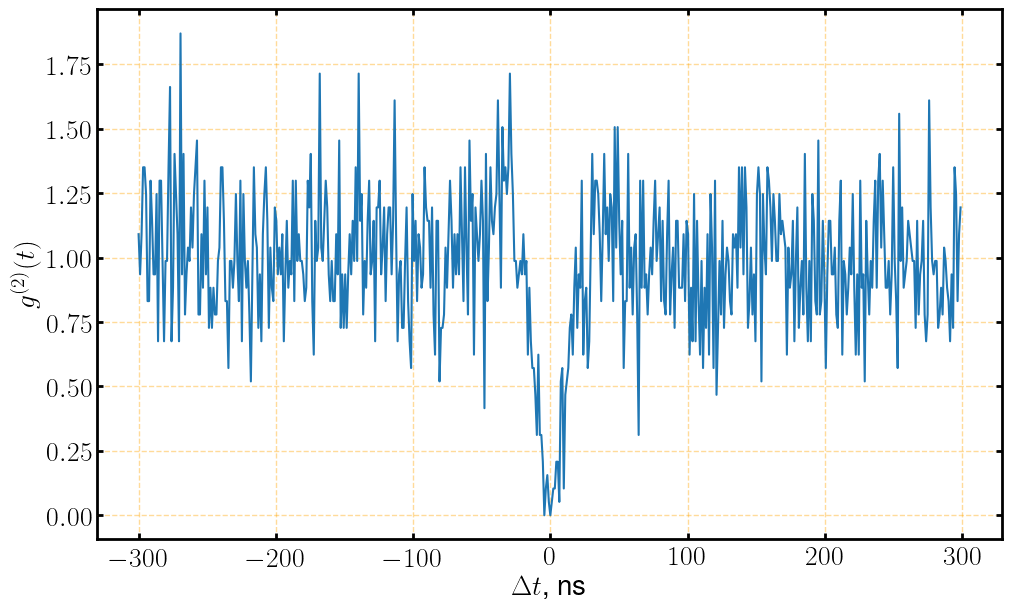

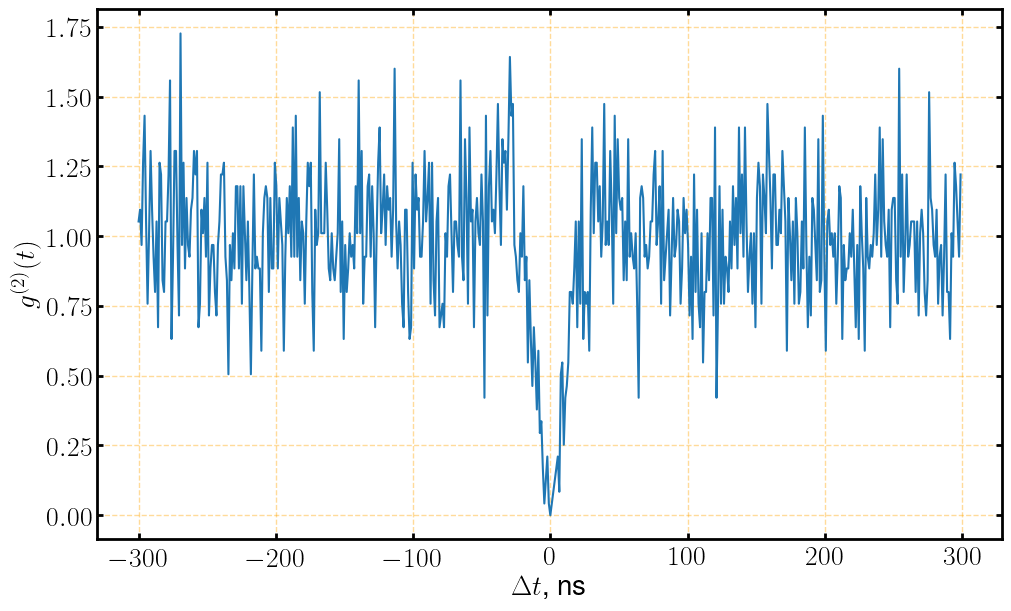

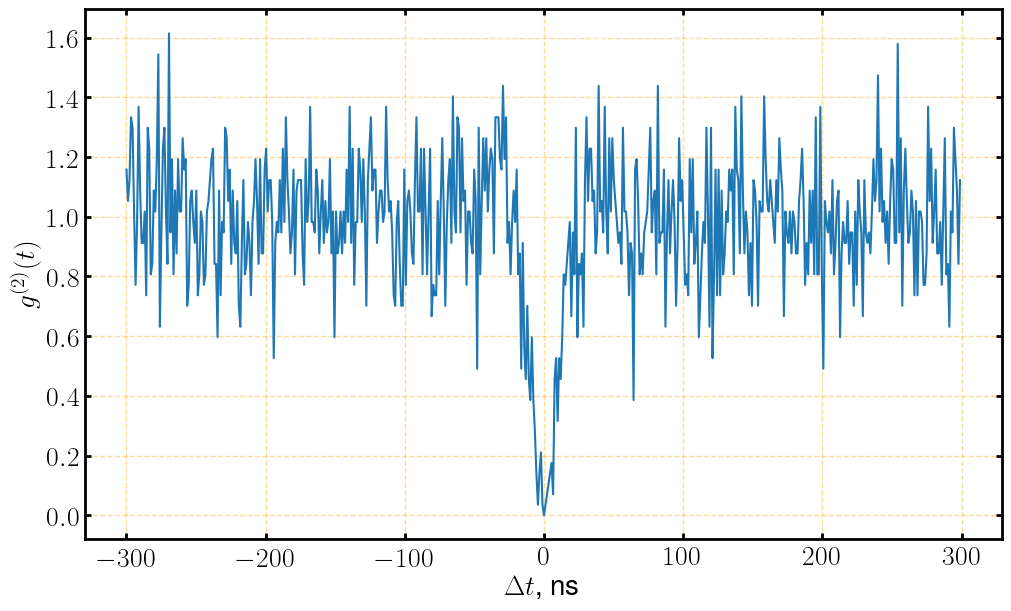

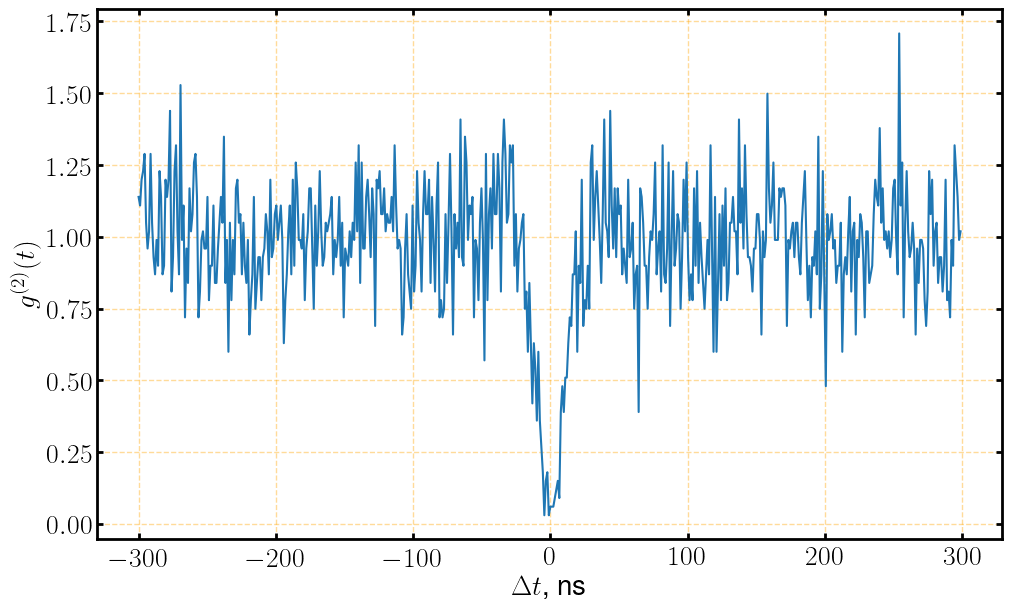

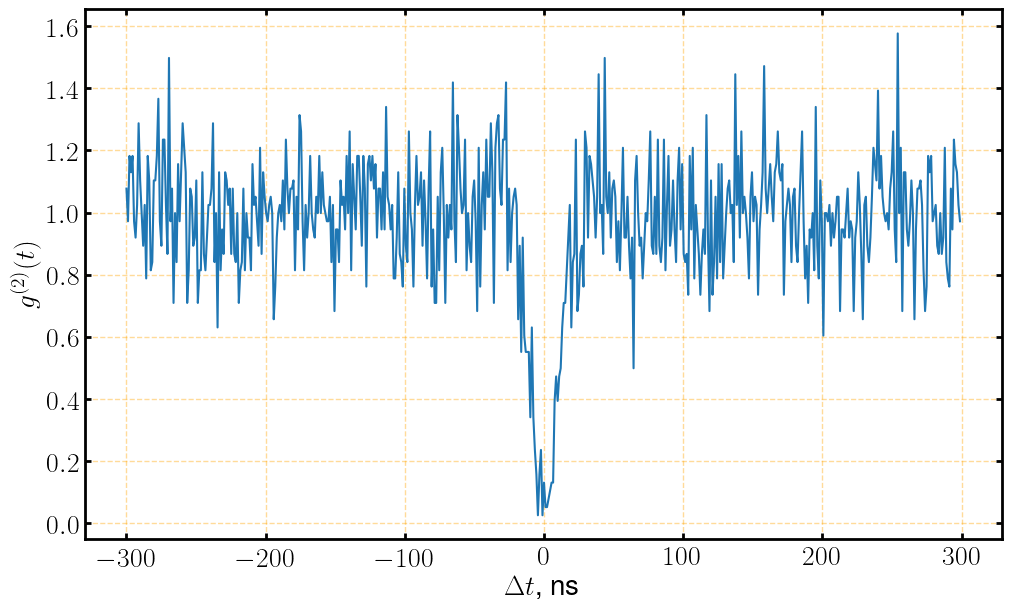

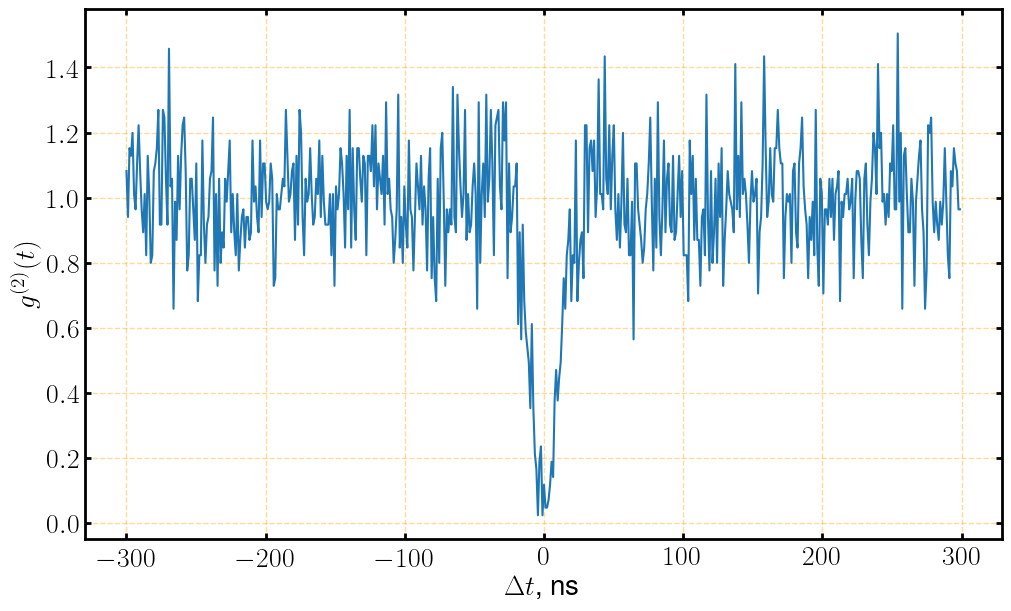

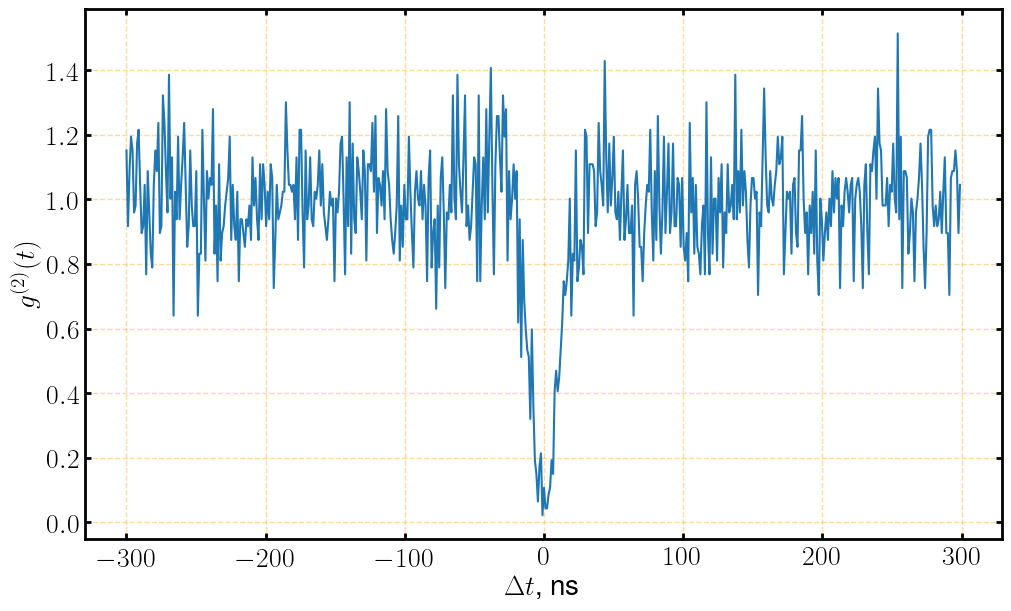

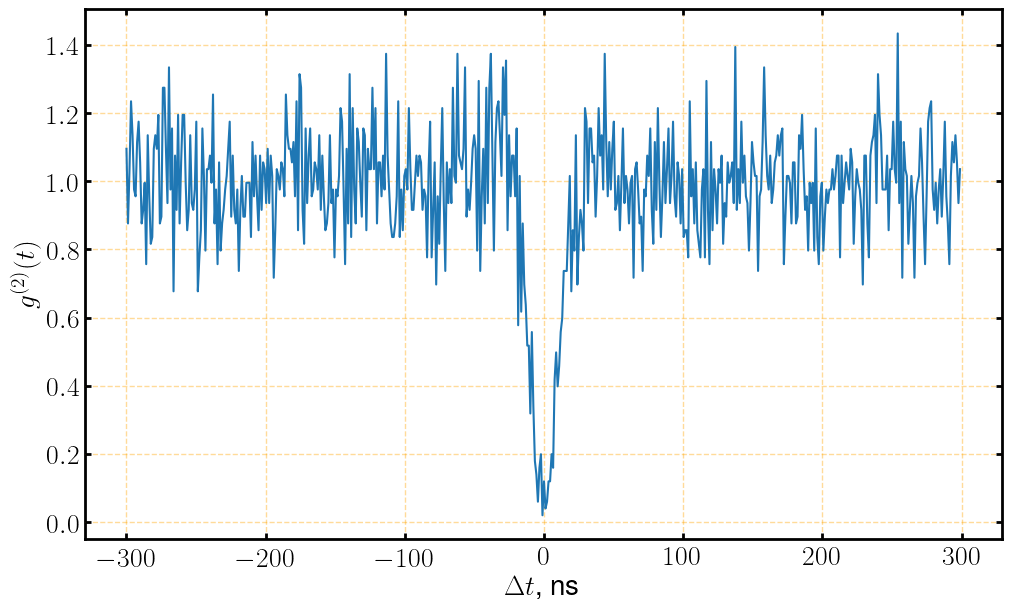

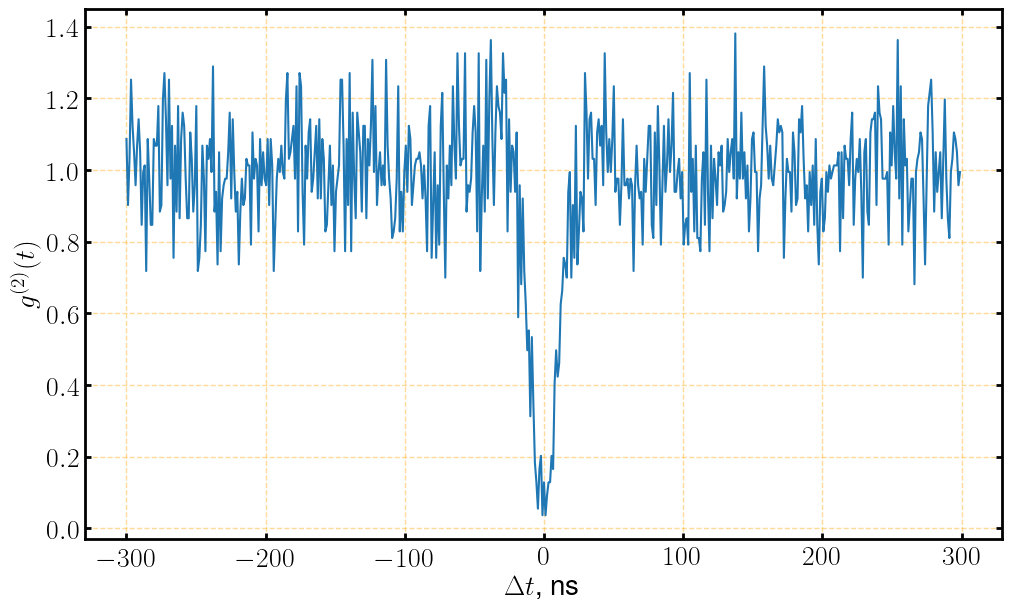

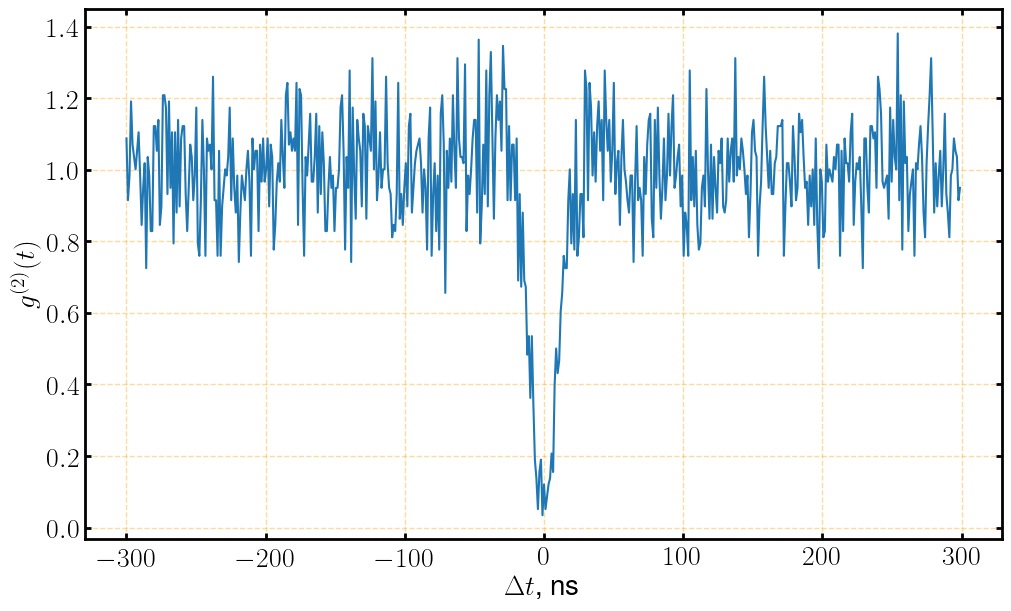

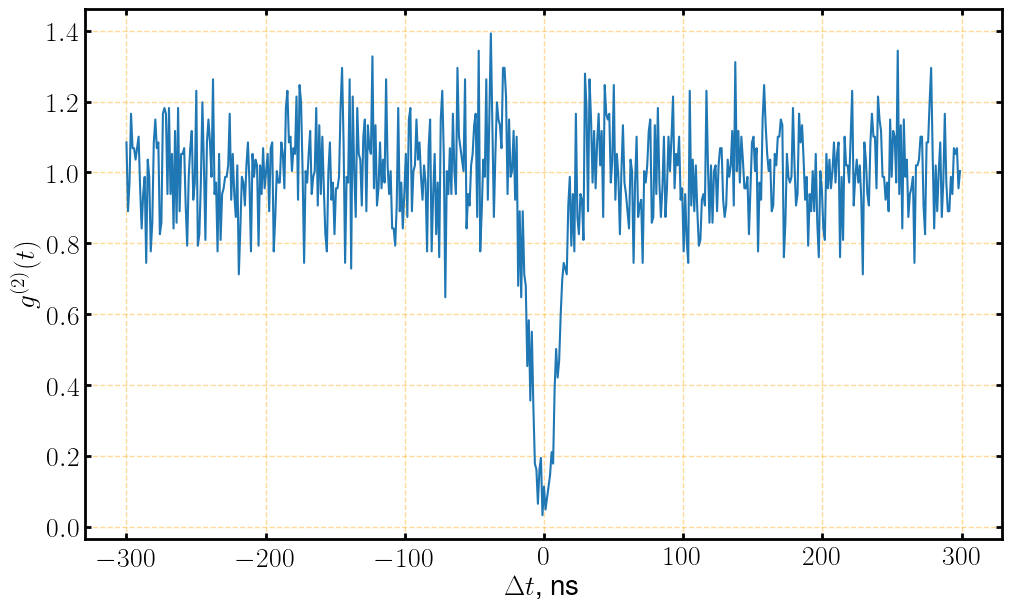

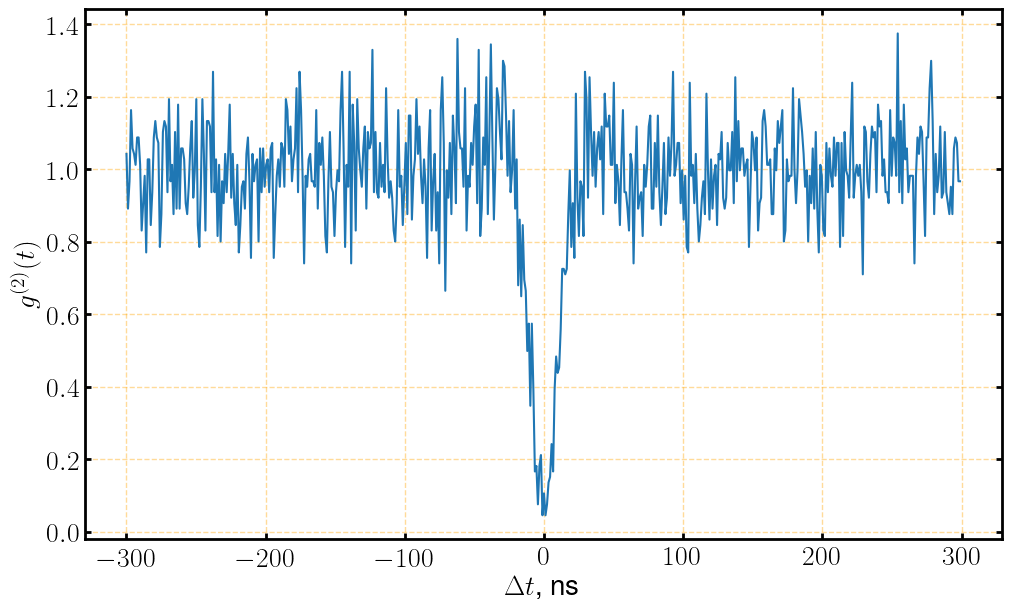

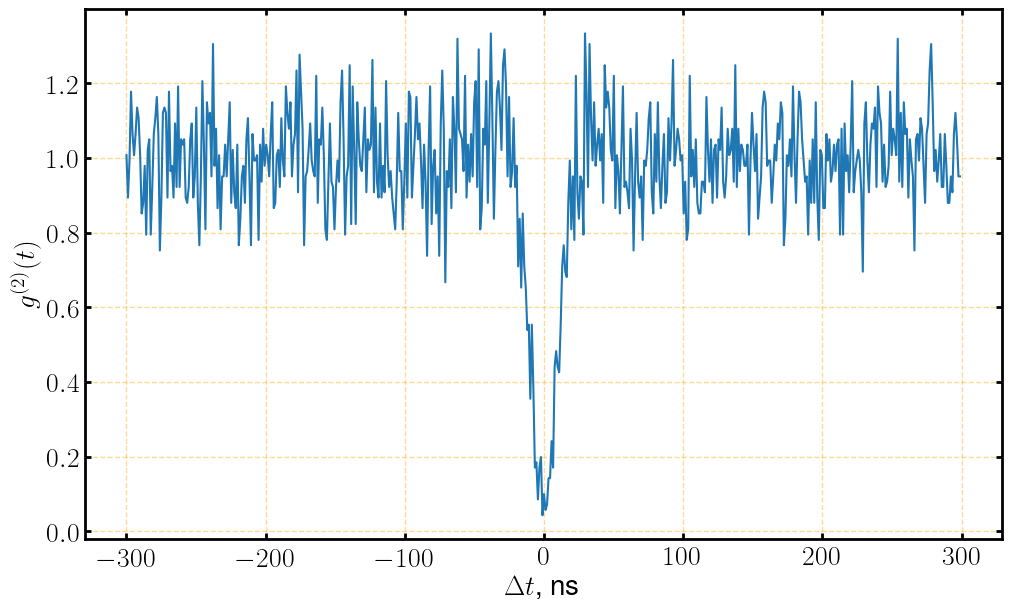

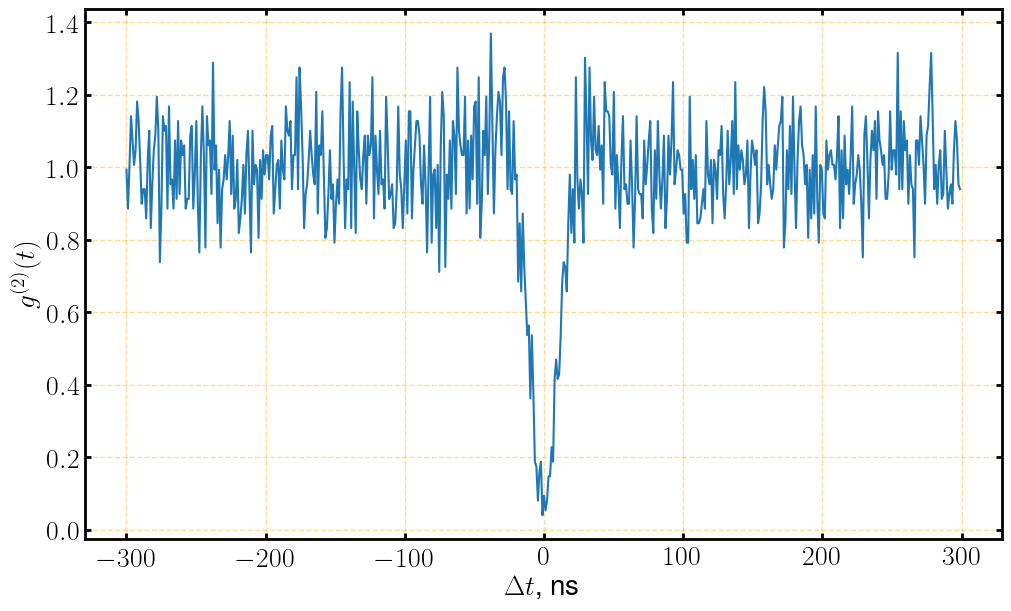

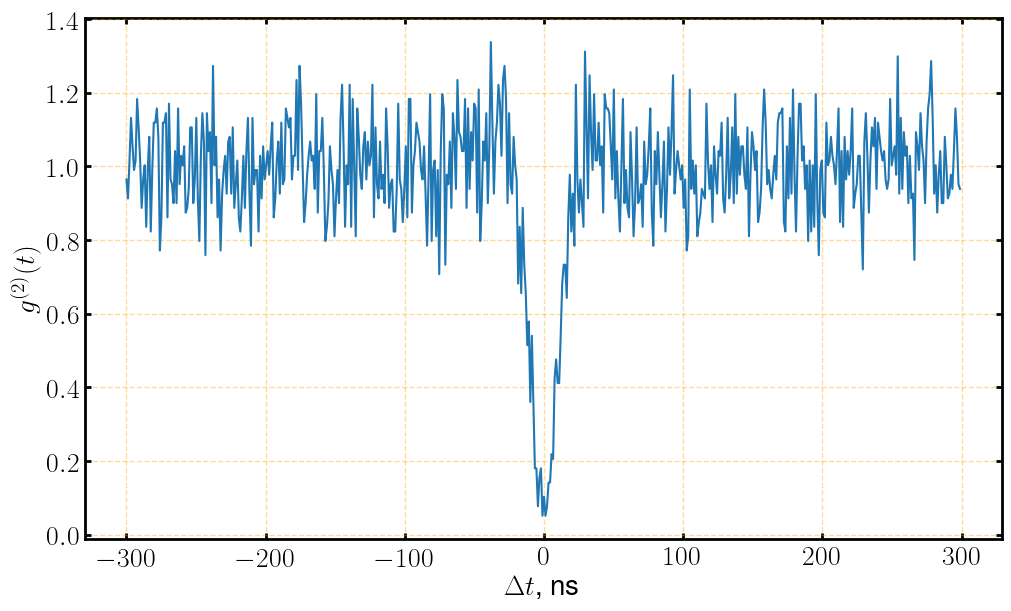

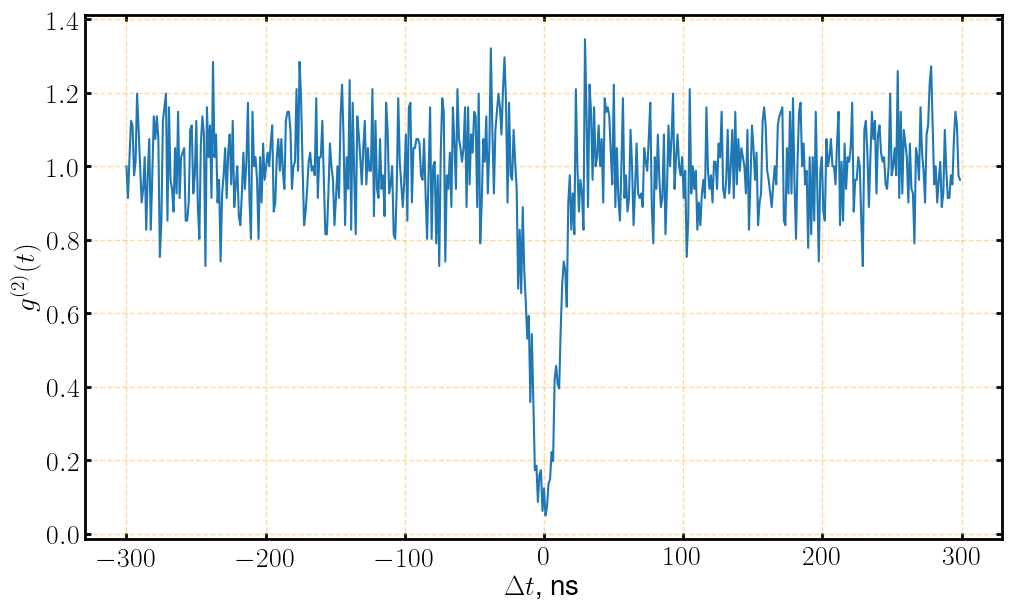

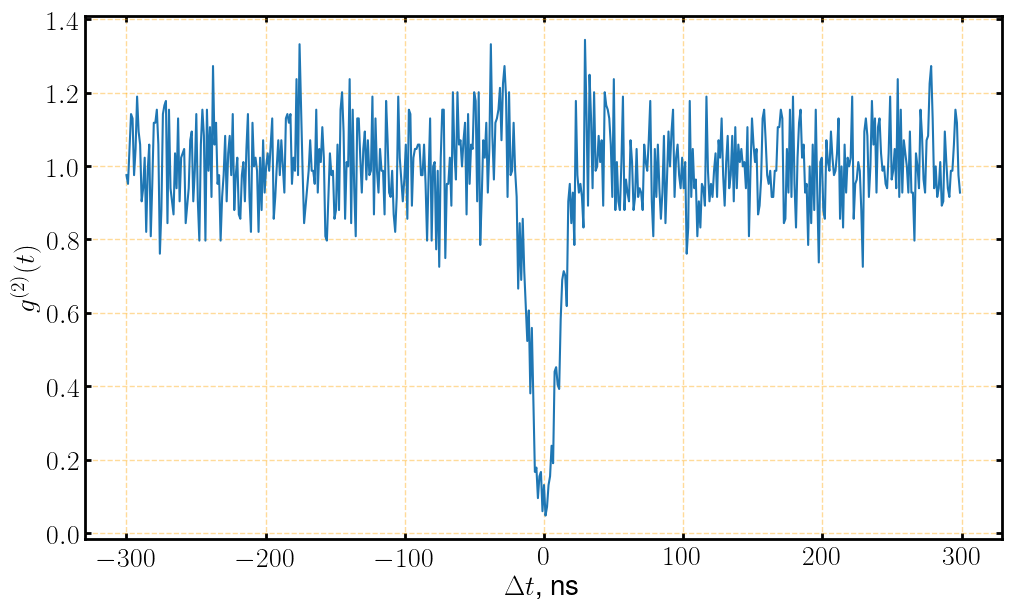

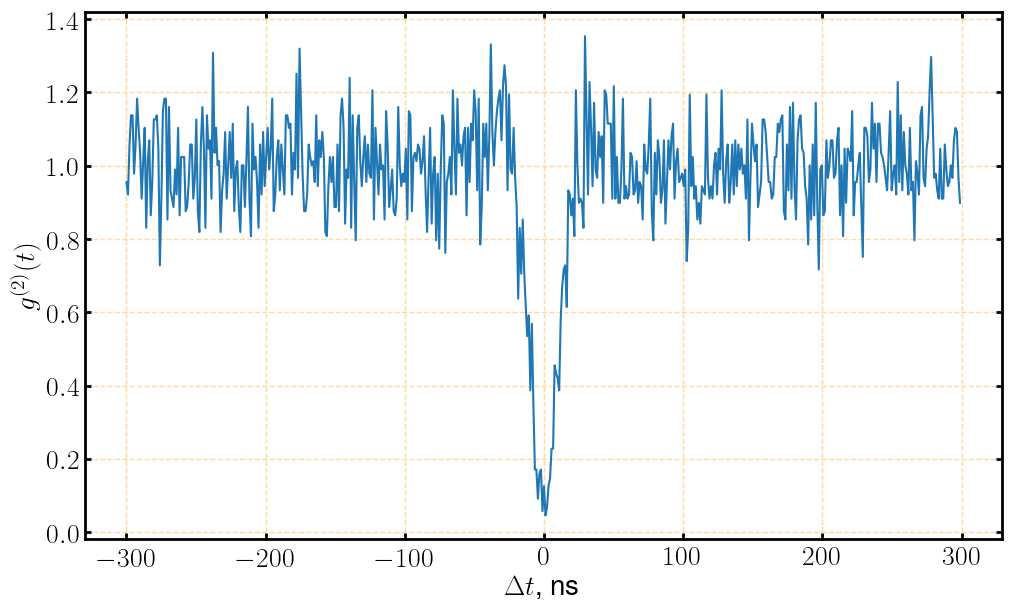

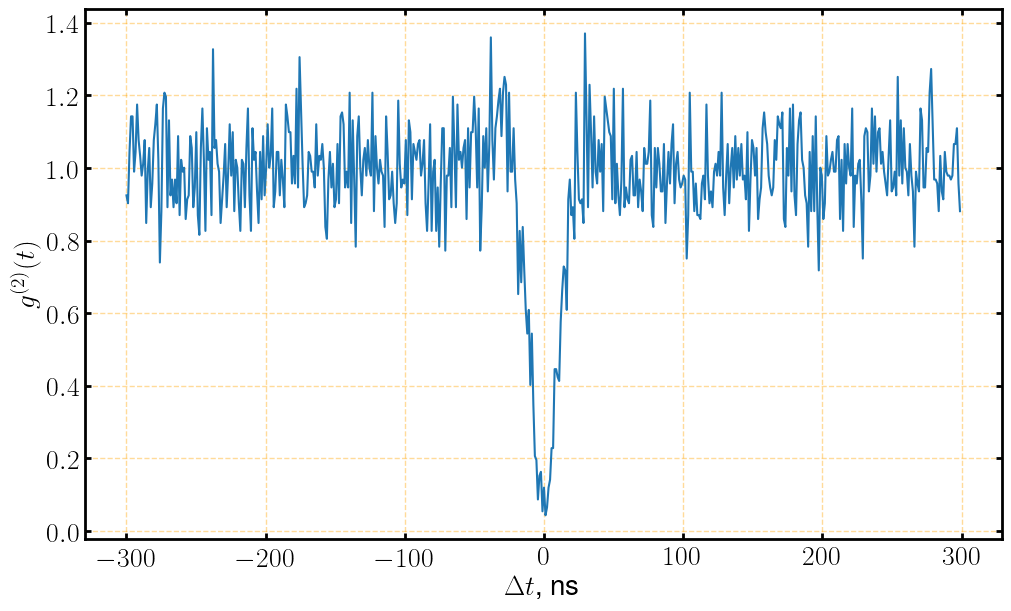

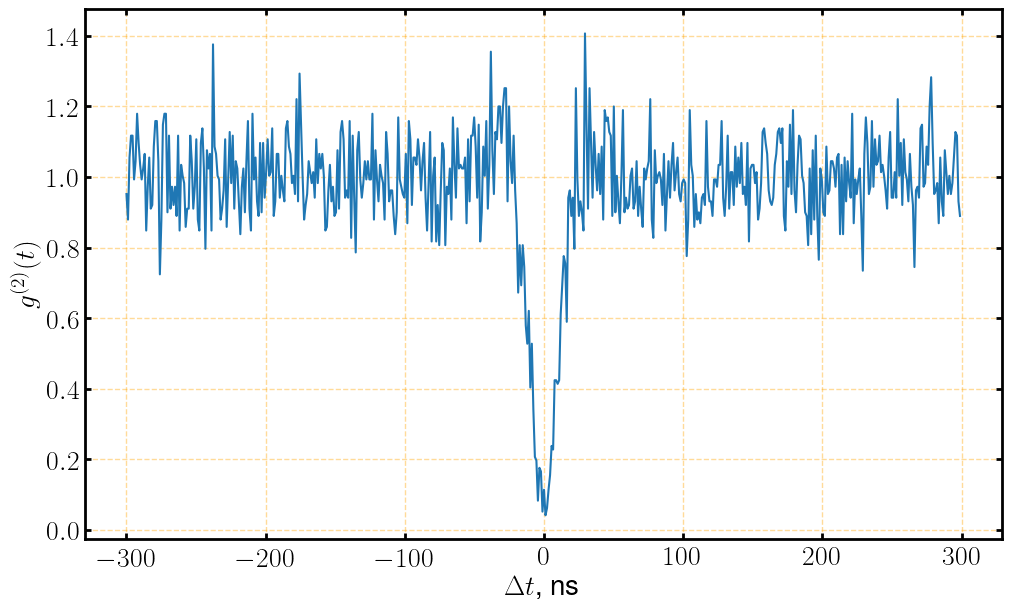

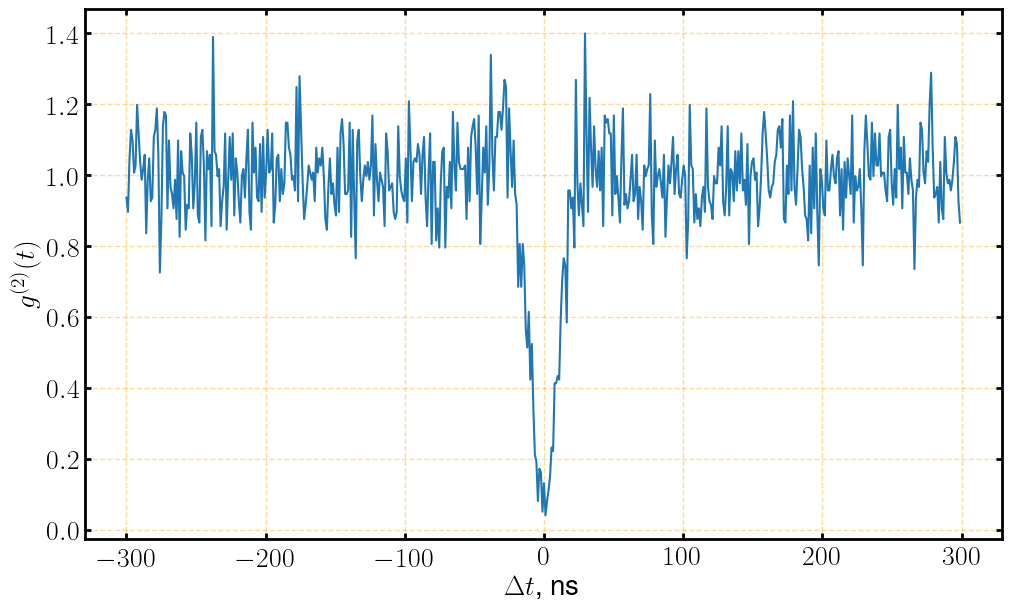

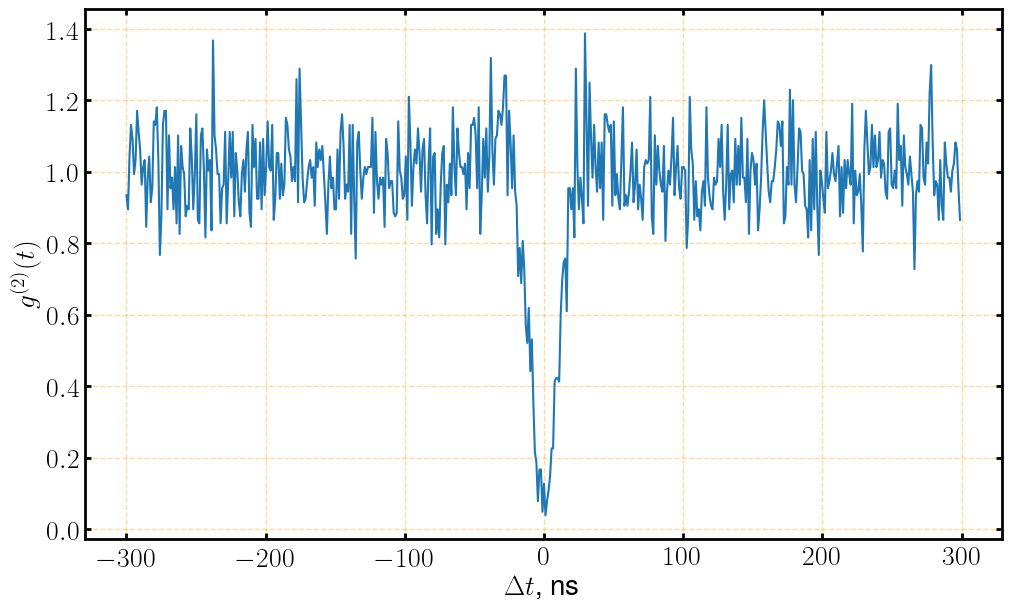

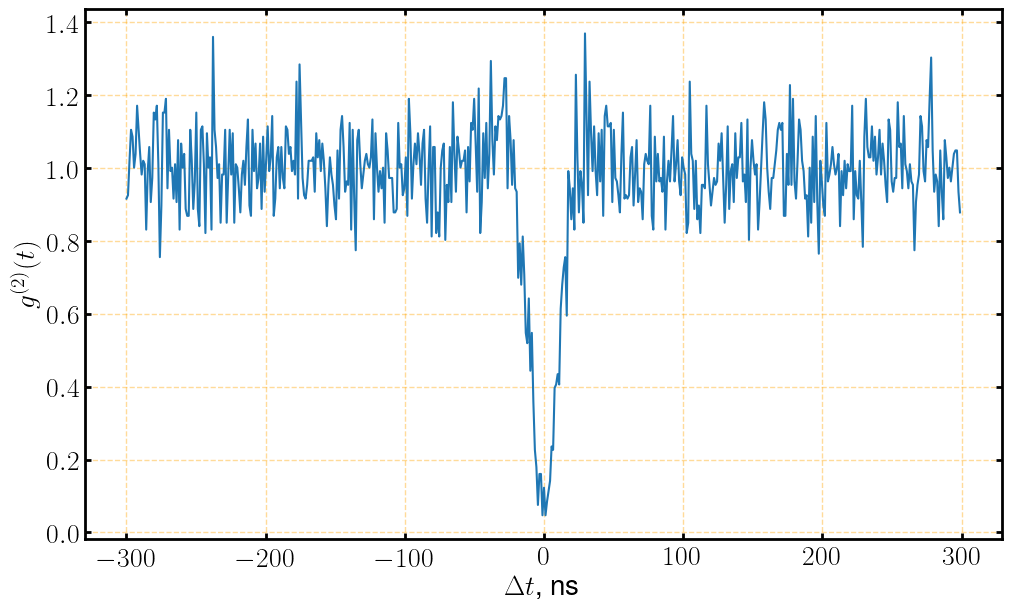

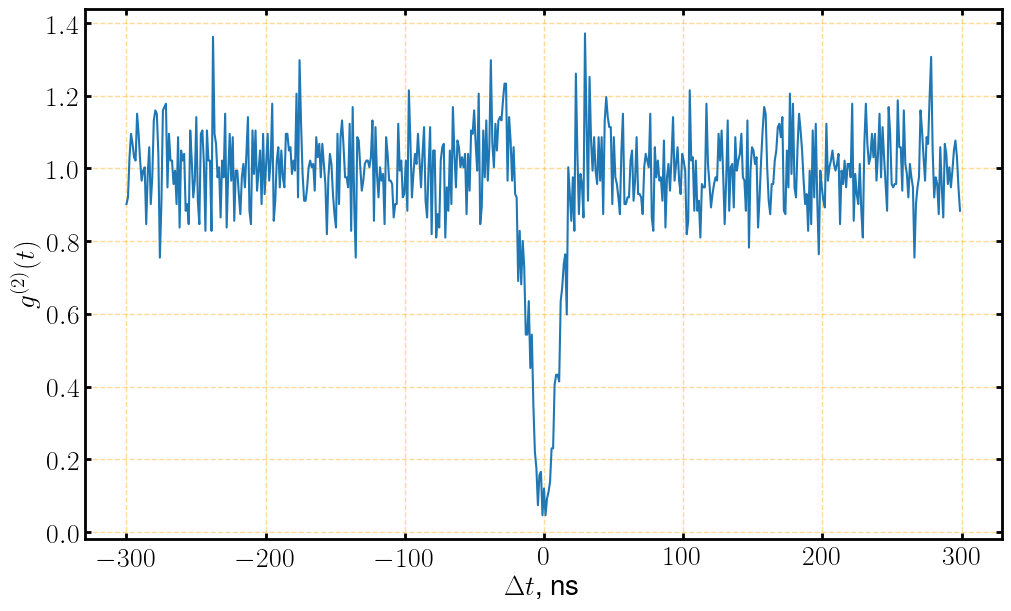

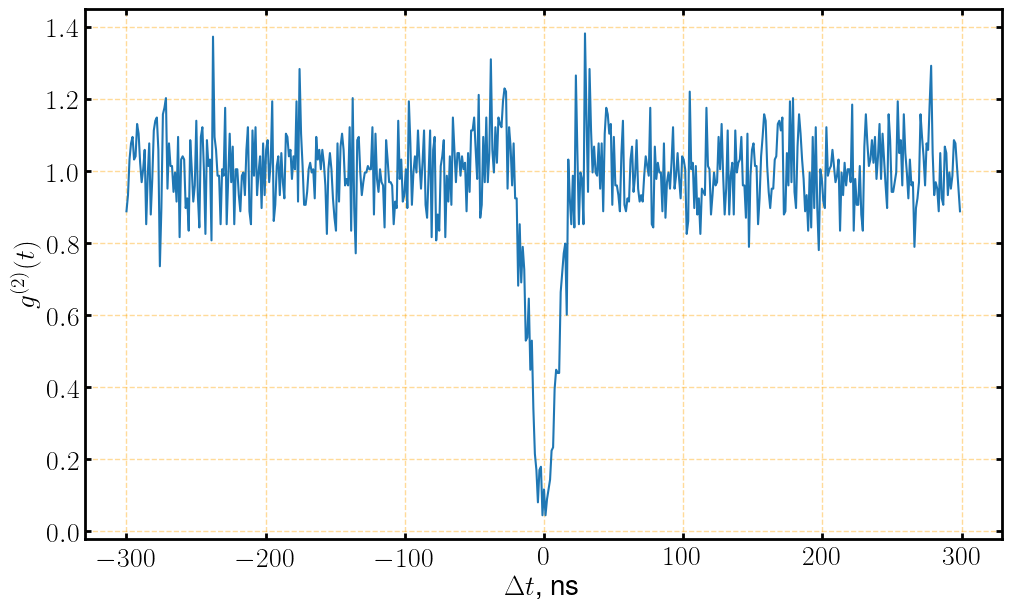

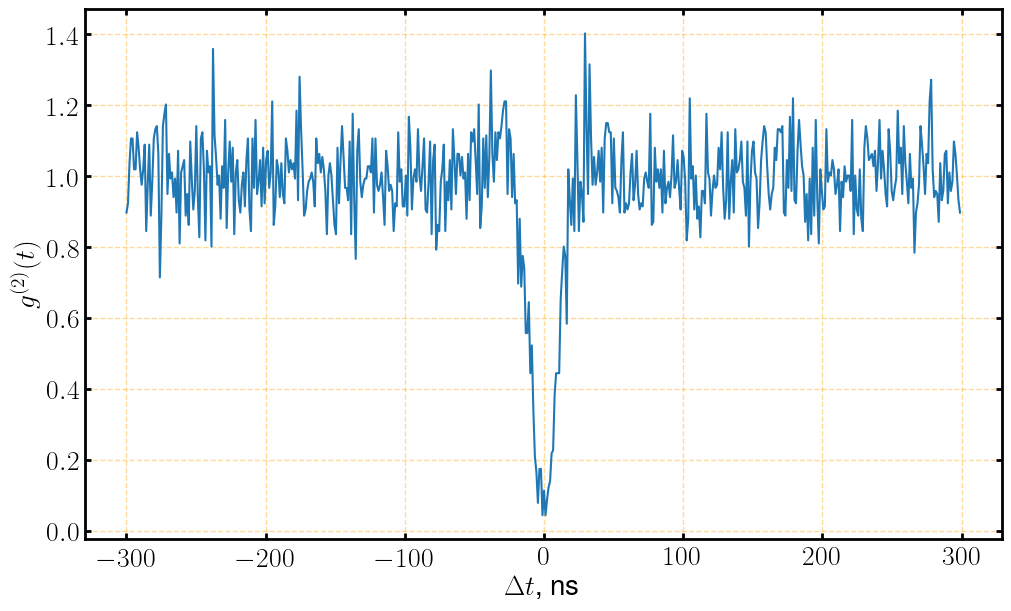

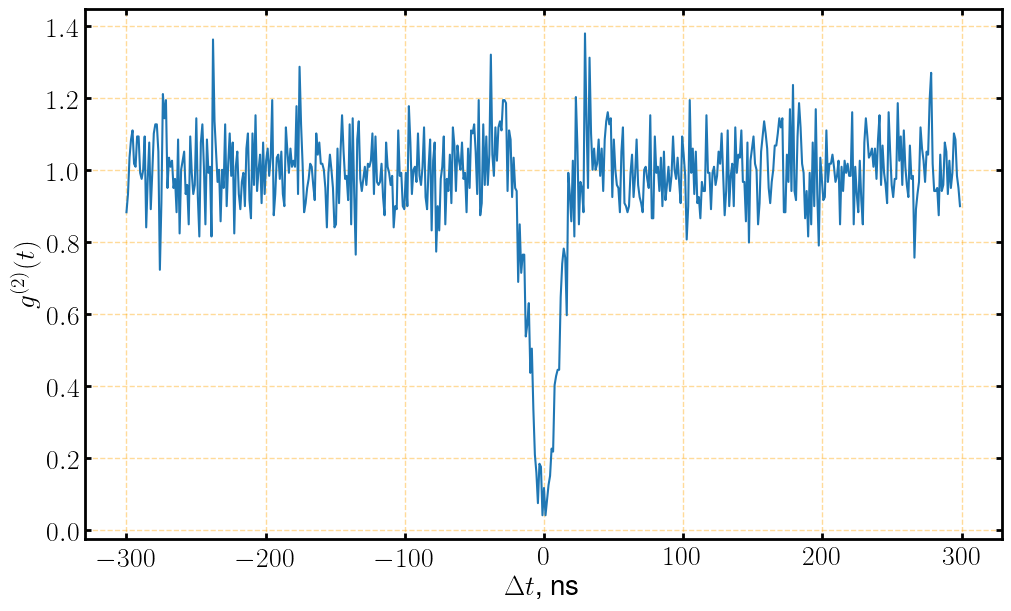

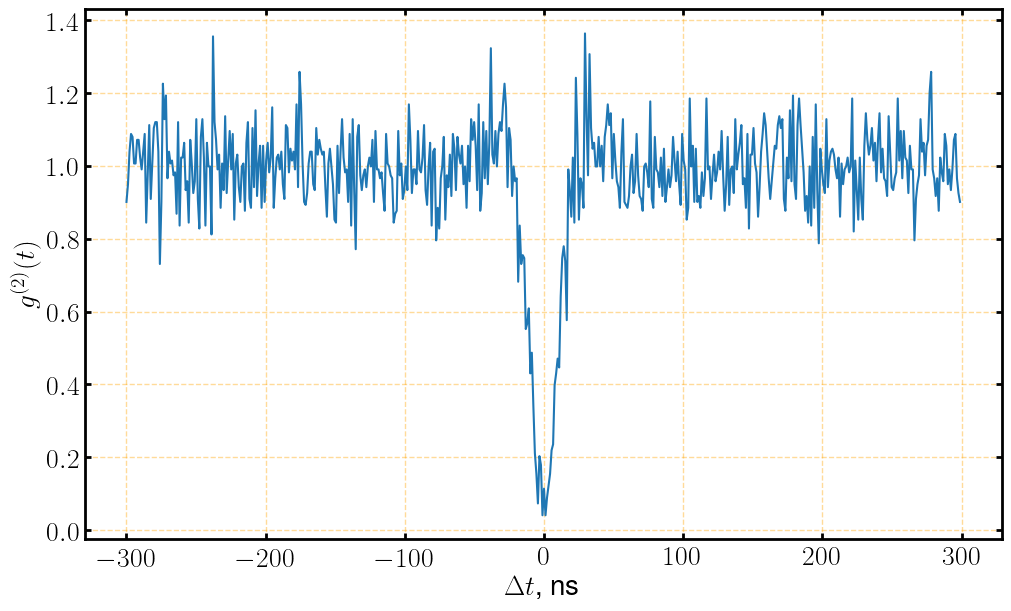

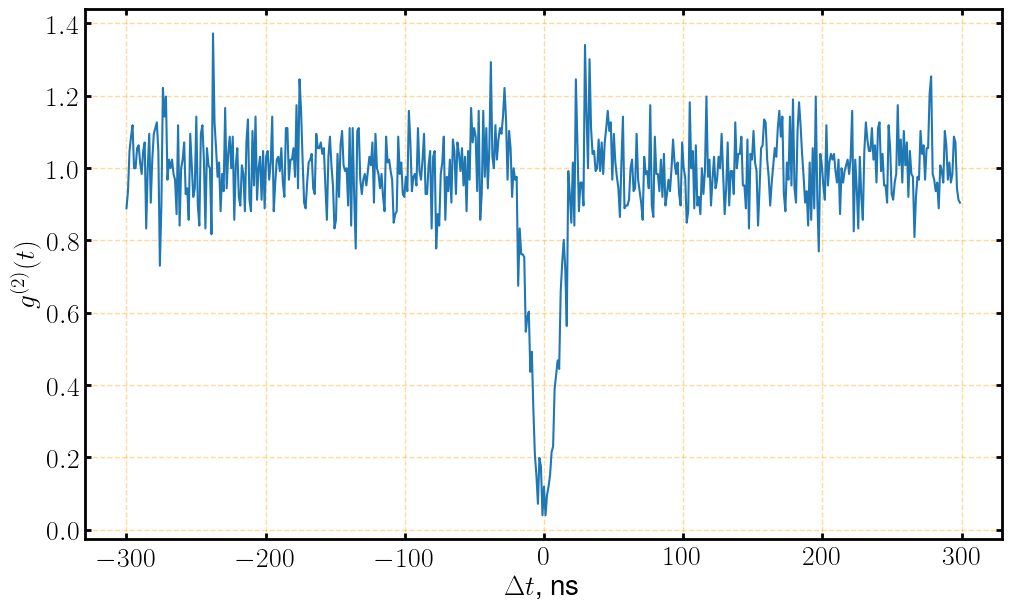

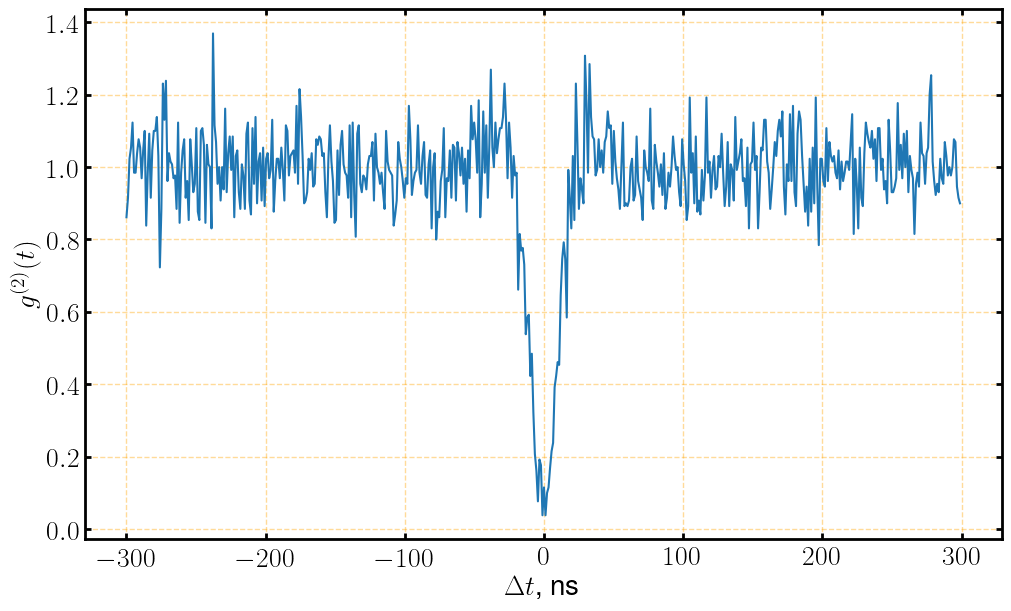

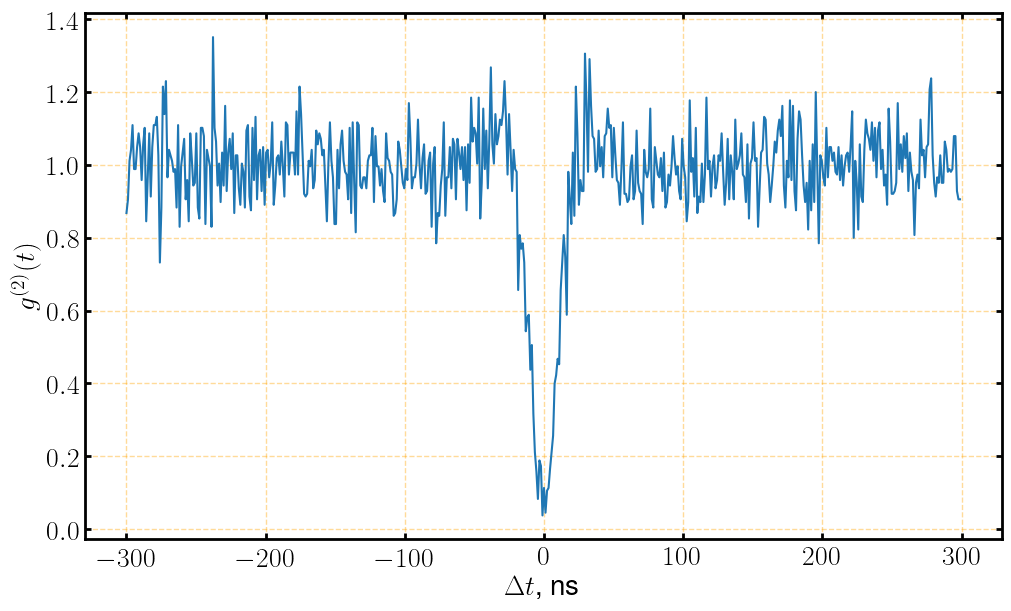

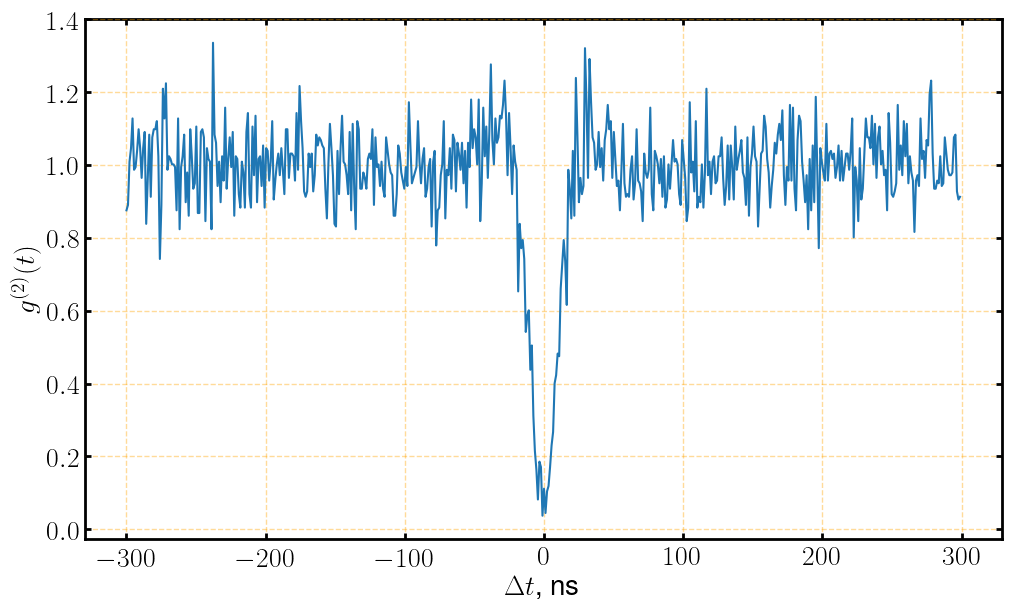

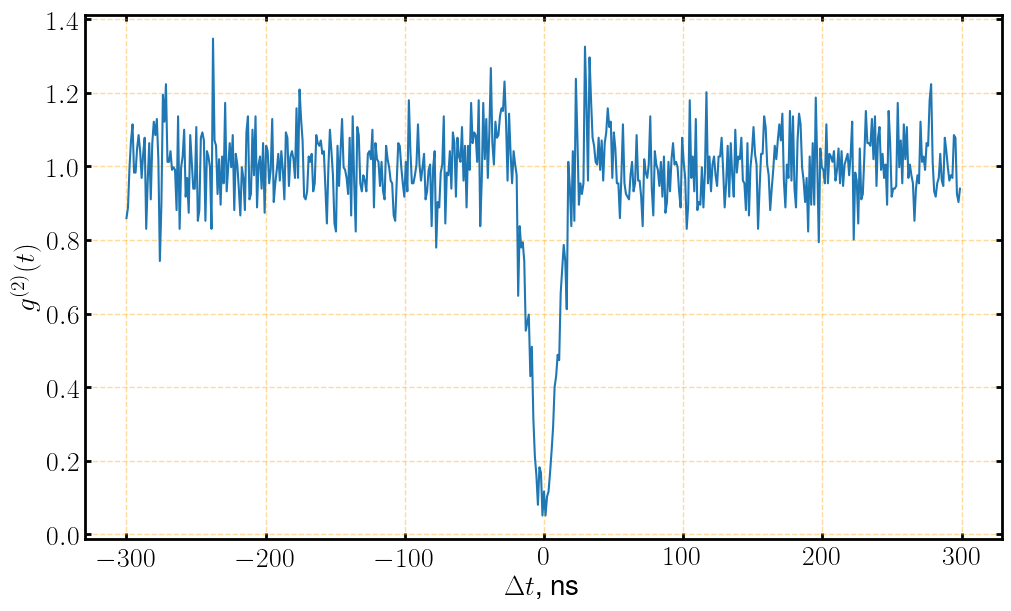

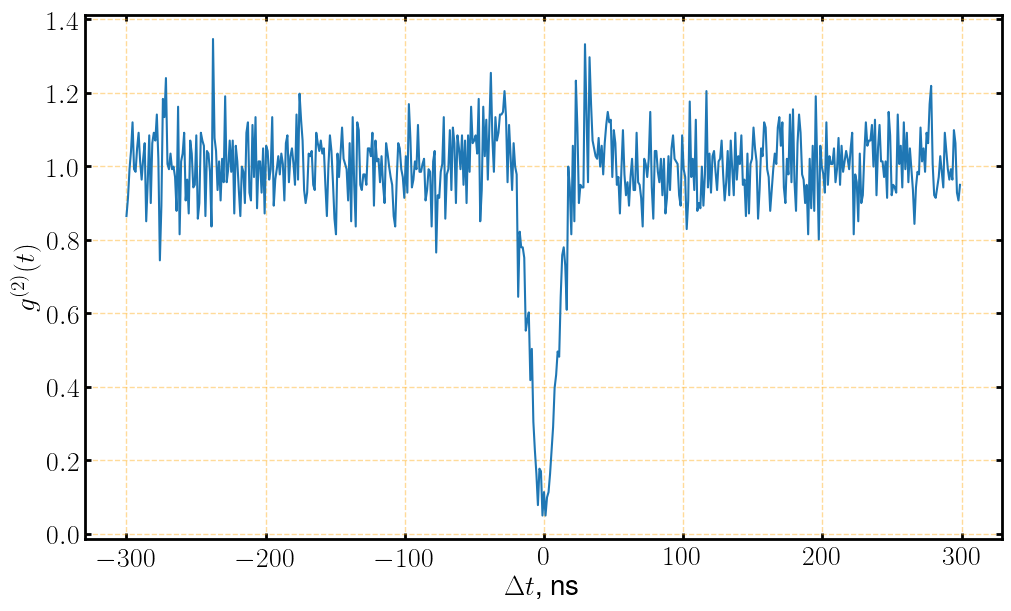

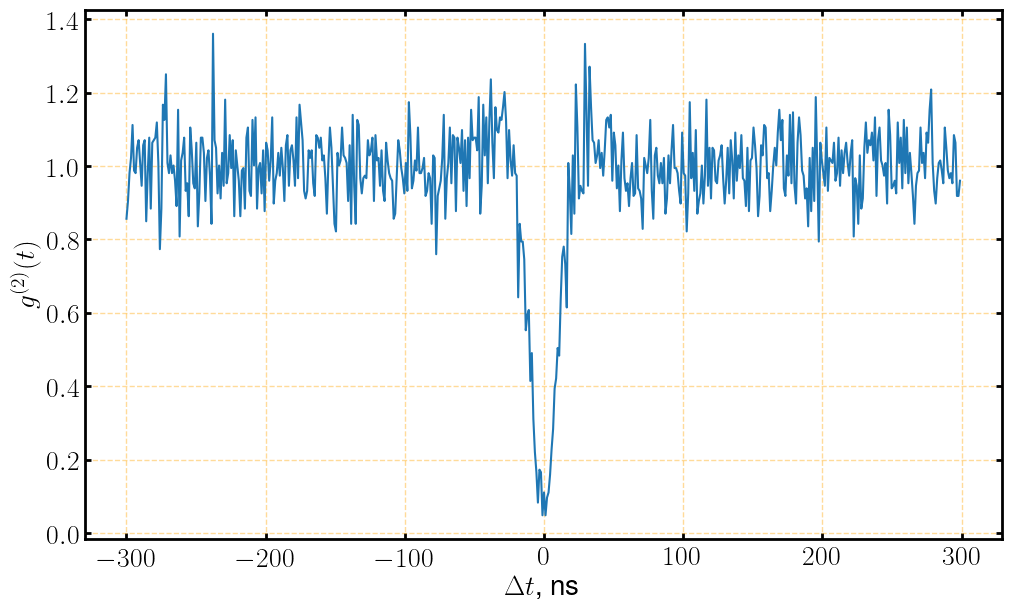

In [241]:
generate_animation_imgs(plots)